In [ ]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install sklearn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("vgsales.csv")

# get an idea of the total number of occurences for important features

publishers = df['Publisher'].unique()
platforms = df['Platform'].unique()
genres = df['Genre'].unique()

print("Number of games: ", len(df))
print("Number of publishers: ", len(publishers))
print("Number of platforms: ", len(platforms))
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


In [3]:


# check to see if there are any null values
print(df.isnull().sum())

# drop them if there are any
df = df.dropna()



Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


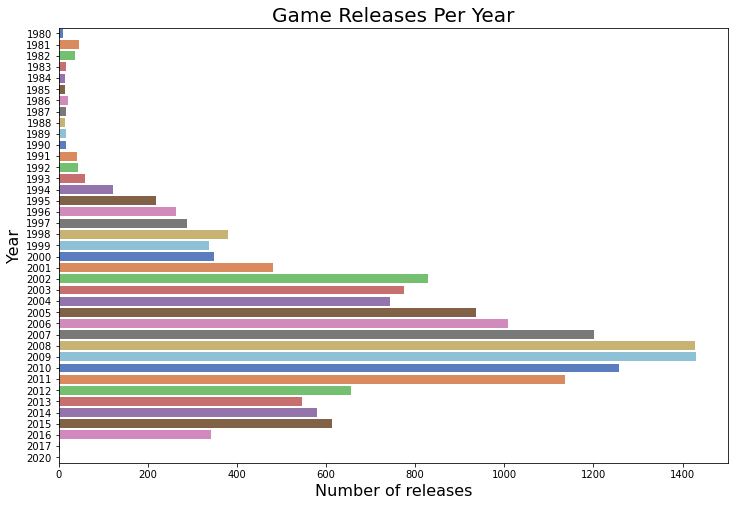

In [4]:
# if we wanted the counts instead, we could just use Count. Count returns the number of instances,
# not the sums of the values like above
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.8

C:\Users\dnelsamz\AppData\Local\Temp/ipykernel_34668/4189839519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vg_data['Publisher'][vg_data['Publisher'] == i] = 'Other'
C:\Users\dnelsamz\AppData\Local\Temp/ipykernel_34668/4189839519.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vg_data['Platform'][vg_data['Platform'] == i] = 'Other'


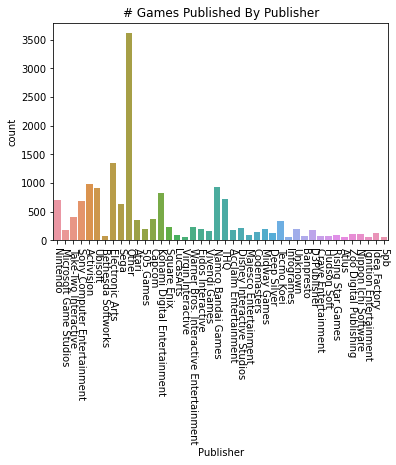

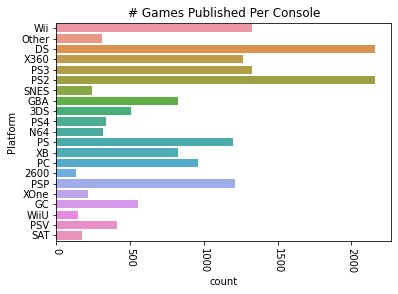

In [5]:
vg_data = pd.read_csv('vgsales.csv')

print(vg_data.info())
print(vg_data.describe())

# let's choose a cutoff and drop any publishers that have published less than X games

for i in vg_data['Publisher'].unique():
    if vg_data['Publisher'][vg_data['Publisher'] == i].count() < 60:
        vg_data['Publisher'][vg_data['Publisher'] == i] = 'Other'

for i in vg_data['Platform'].unique():
    if vg_data['Platform'][vg_data['Platform'] == i].count() < 100:
        vg_data['Platform'][vg_data['Platform'] == i] = 'Other'

#try plotting the new publisher and platform data
sns.countplot(x='Publisher', data=vg_data)
plt.title("# Games Published By Publisher")
plt.xticks(rotation=-90)
plt.show()

plat_data = vg_data['Platform'].value_counts(sort=False)
sns.countplot(y='Platform', data=vg_data)
plt.title("# Games Published Per Console")
plt.xticks(rotation=-90)
plt.show()

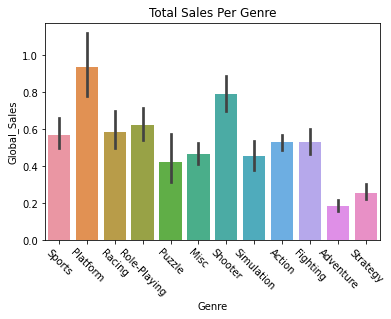

In [6]:
sns.barplot(x='Genre', y='Global_Sales', data=vg_data)
plt.title("Total Sales Per Genre")
plt.xticks(rotation=-45)
plt.show()

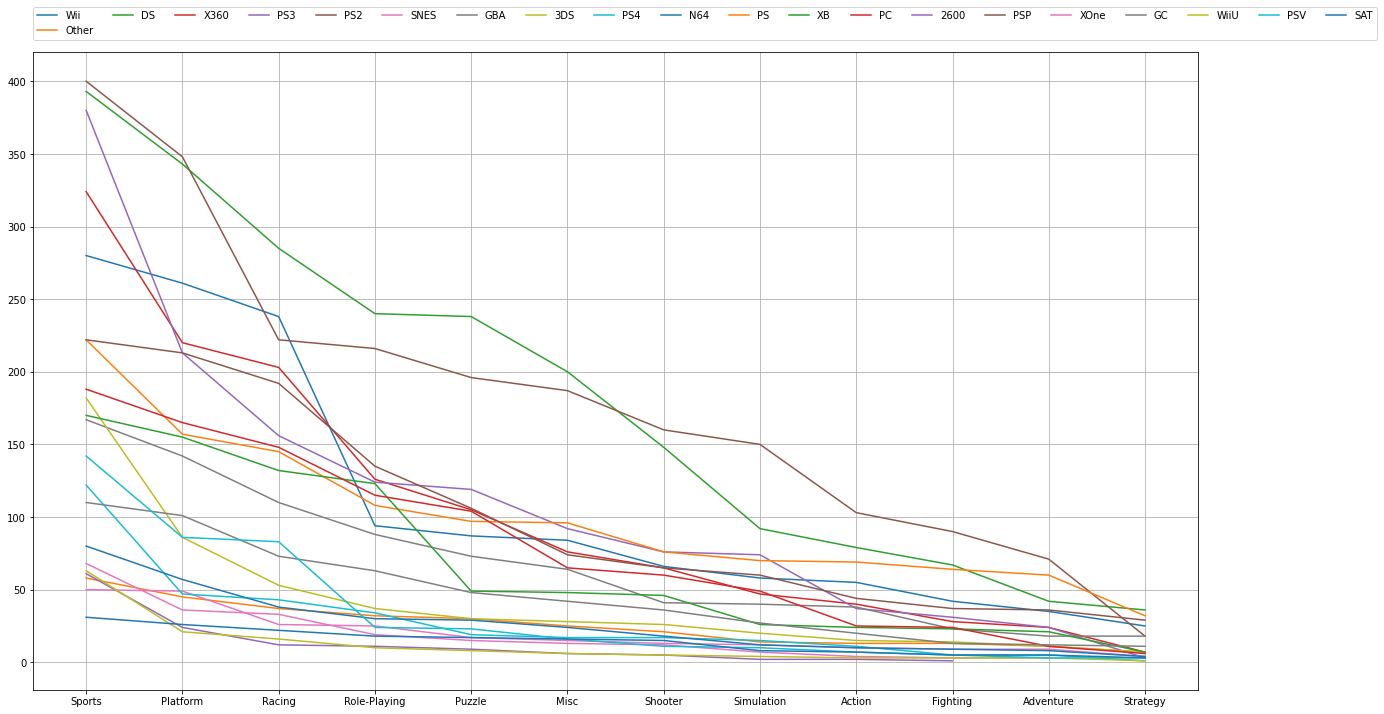

In [7]:
# try visualizing the number of games in a specific genre
for i in vg_data['Platform'].unique():
    vg_data['Genre'][vg_data['Platform'] == i].value_counts().plot(kind='line', label=i, figsize=(20, 10), grid=True)

# set the legend and ticks

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=20, borderaxespad=0.)
plt.xticks(np.arange(12), tuple(vg_data['Genre'].unique()))
plt.tight_layout()
plt.show()

In [8]:
# going to attempt to carry out linear regression and predict the global sales of games
# based off of the sales in North America

X = vg_data.iloc[:, 6].values
y = vg_data.iloc[:, 10].values

# train test split and split the dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [9]:
# reshape the data into long 2D arrays with 1 column and as many rows as necessary
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

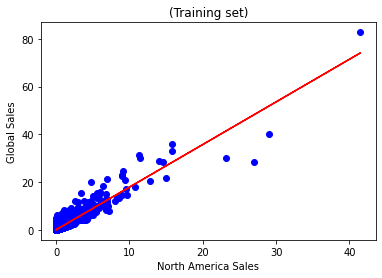

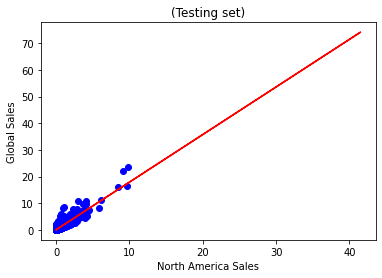

Training set score: 0.89
Test set score: 0.87


In [10]:
def plot_regression(classifier):

    plt.scatter(X_train, y_train,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Training set)')
    plt.xlabel('North America Sales')
    plt.ylabel('Global Sales')
    plt.show()

    plt.scatter(X_test, y_test,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Testing set)')
    plt.xlabel('North America Sales')
    plt.ylabel('Global Sales')
    plt.show()
    
plot_regression(lin_reg)
print("Training set score: {:.2f}".format(lin_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lin_reg.score(X_test, y_test)))



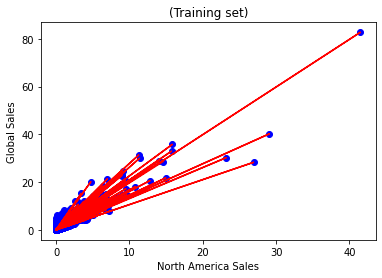

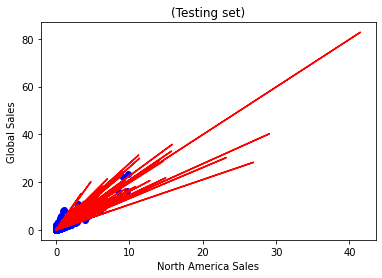

Training set score: 0.96
Test set score: 0.81


In [11]:
DTree_regressor = DecisionTreeRegressor(random_state=5)
DTree_regressor.fit(X_train, y_train)
plot_regression(DTree_regressor)

print("Training set score: {:.2f}".format(DTree_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(DTree_regressor.score(X_test, y_test)))

C:\Users\dnelsamz\AppData\Local\Temp/ipykernel_34668/3781778288.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_regressor.fit(X_train, y_train)


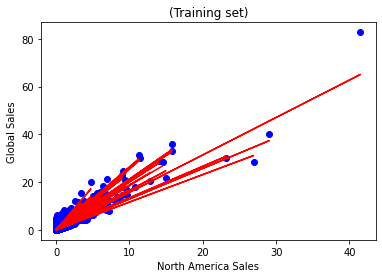

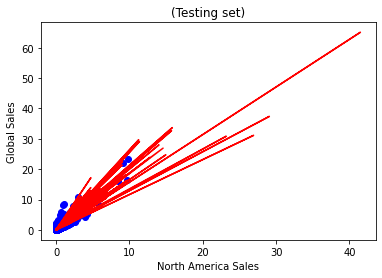

Training set score: 0.94
Test set score: 0.84


In [12]:
RF_regressor = RandomForestRegressor(n_estimators=300, random_state=5)
RF_regressor.fit(X_train, y_train)
plot_regression(RF_regressor)

print("Training set score: {:.2f}".format(RF_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RF_regressor.score(X_test, y_test)))

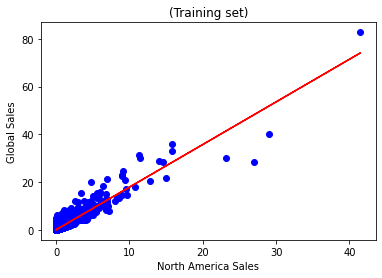

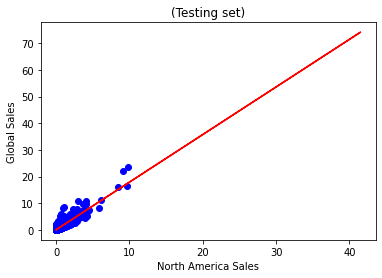

Training set score: 0.89
Test set score: 0.87


In [13]:
components = [
    ('scaling', StandardScaler()),
    ('PCA', PCA()),
    ('regression', LinearRegression())
]

pca = Pipeline(components)
pca.fit(X_train, y_train)
plot_regression(pca)
print("Training set score: {:.2f}".format(pca.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pca.score(X_test, y_test)))

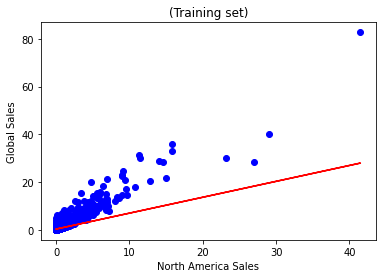

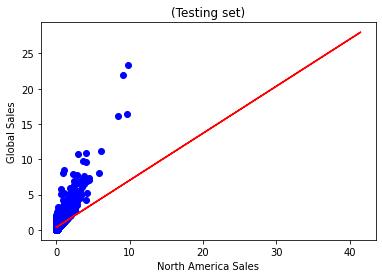

Training set score: 0.54
Test set score: 0.51


In [14]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
plot_regression(elastic)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

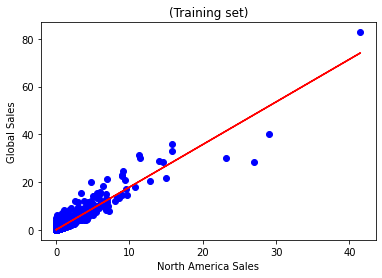

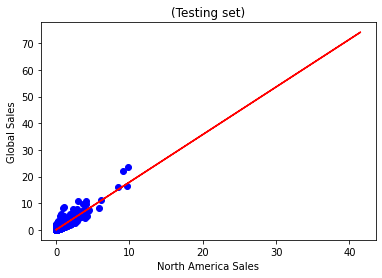

Training set score: 0.89
Test set score: 0.87


In [15]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
plot_regression(ridge_reg)
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(X_test, y_test)))

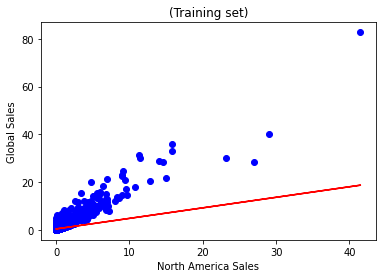

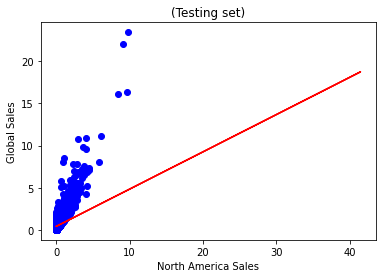

Training set score: 0.38
Test set score: 0.36


In [16]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
plot_regression(lasso_reg)
print("Training set score: {:.2f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(X_test, y_test)))

C:\Users\dnelsamz\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


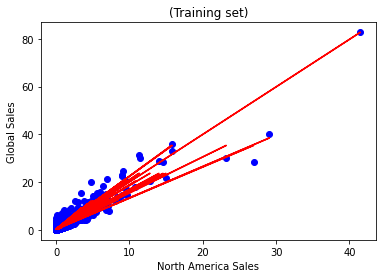

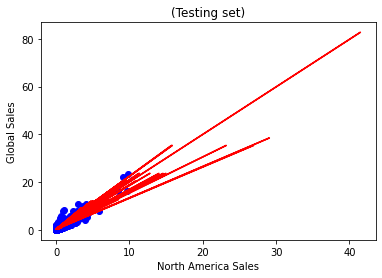

Training set score: 0.90
Test set score: 0.82


In [17]:
# ADA Boost regressor
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)
plot_regression(ada_reg)

print("Training set score: {:.2f}".format(ada_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ada_reg.score(X_test, y_test)))